In [1]:
!pip freeze > requirements.txt

In [ ]:
!pip install pandas.tools
!pip install category_encoders
# linear algebra and data processing
import numpy as np
import pandas as pd
from numpy import array
from numpy import argmax 
from pandas import DataFrame

#visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import RobustScaler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
from sklearn import preprocessing
from sklearn.decomposition import PCA
import category_encoders as ce
from pandas import set_option
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import xgboost 
from xgboost import XGBClassifier
from sklearn import metrics



# math and statistics
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# ignnore warnings
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

**LOading our Bank Dataset**

In [4]:
#Loading data
data=pd.read_csv('/content/drive/My Drive/bank-additional-full.csv',sep=";")
print("The data has {} rows with {} features/columns".format(data.shape[0], data.shape[1])) #Viewing the shape our dataset

The data has 41188 rows with 21 features/columns


In [5]:
#Viewing the first five rows of our dataset
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Data Features**

In [6]:

# quick peak

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Checking if there are missing values**

In [7]:
print("The number of missing value(s): {}".format(data.isnull().sum().sum()))

The number of missing value(s): 0


## **Data Exploration**

In [8]:
data.select_dtypes(include=["int64", "float64"]).describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


From the data, we observe that the mean age is  40  years with a maximum age of  98  years and minimum age of  17  years. The balance is the average yearly balance which is in euros.

**1. Univariate Analysis**

In [9]:
#A function to help in graphical univariate analysis

def plot(x,data):
    plot= sns.catplot(x, kind="count", data=data, palette="Set1")
    plt.xticks(rotation=45, horizontalalignment='right' )
    plt.title("counts"+ " "+ "of" + " "+ " " + x )
    return 

**1.1 Target**

We will check if out target variable is balanced 

Text(0.5, 1.0, 'Target variable count')

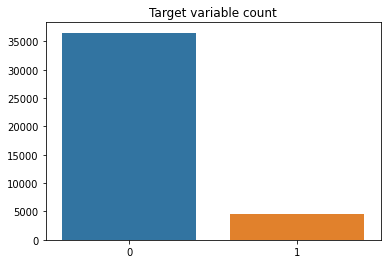

In [10]:
x=data['y'].value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

In [11]:
print('Proportion of the classes in the data:')
print(data['y'].value_counts() / len(data))

Proportion of the classes in the data:
no     0.887346
yes    0.112654
Name: y, dtype: float64


* There is clear a class imbalace problem.
* We will handle the class imbalance problem later but below are the ways that one can handle the problem

Researchers have found that balancing the data will to better classification models. 

## **Resampling**

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

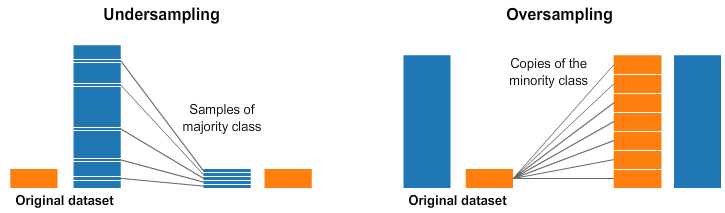

**1.2 Marital Status**

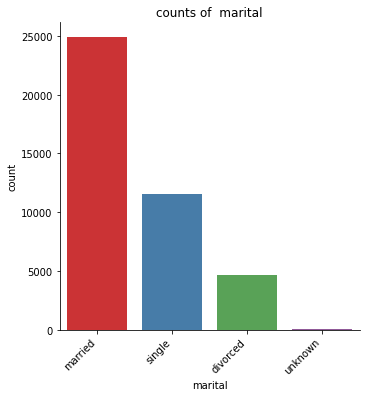

In [12]:
plot("marital", data=data)

**1.3 Education**

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


Text(0.5, 0, 'education')

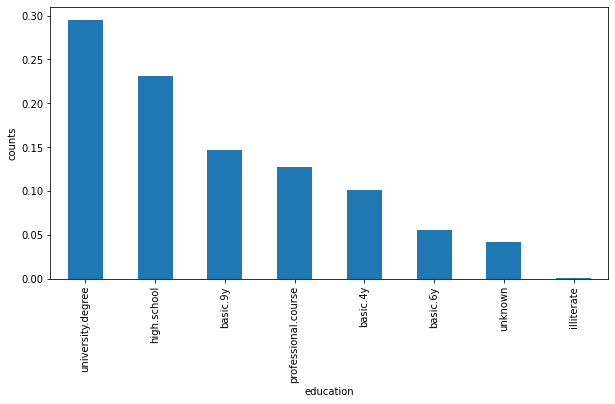

In [13]:
print(data['education'].value_counts())
plt.figure(figsize=(10,5))
data['education'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('education')

**1.4 Job**

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


Text(0.5, 0, 'job')

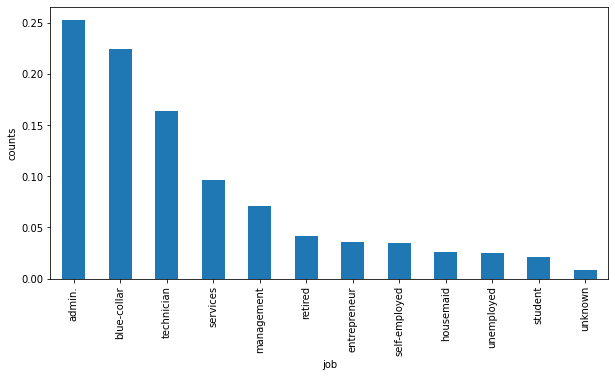

In [14]:
print(data['job'].value_counts())
plt.figure(figsize=(10,5))
data['job'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('job')

**1.5 Age Distribution**

Text(0.5, 1.0, 'Age Distribution')

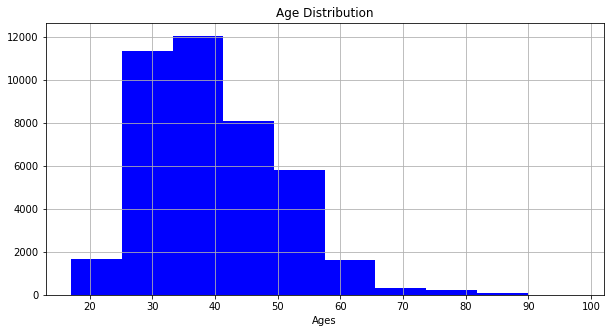

In [15]:
plt.figure(figsize=(10, 5))
data.age.hist( color="blue") 
plt.xlabel('Ages')
plt.title("Age Distribution")

**2.Bivariate Analysis**

In [16]:
def boxplot(x, y, data=data, hue= "y"):
    plot = sns.boxplot(x= x, y=y, hue=hue, data= data)
    plt.xticks( rotation=45, horizontalalignment='right' )
    plt.title("Boxplot of " + " " + x.upper() + " " + "and "+ " " + y.upper())
    return plot

**2.1 Marital vs. age and target**

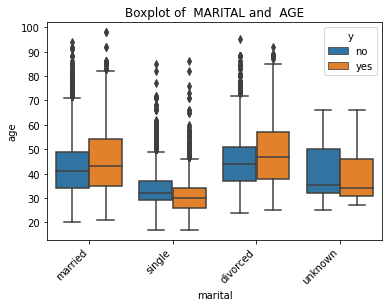

In [17]:
boxplot("marital", "age", data=data, hue= "y")

**2.2 Education vs. age and target**

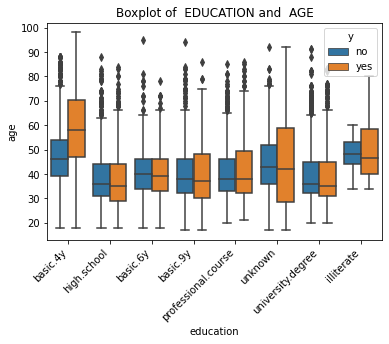

In [18]:
boxplot("education", "age", data=data, hue= "y")

**3. Handling outliers**

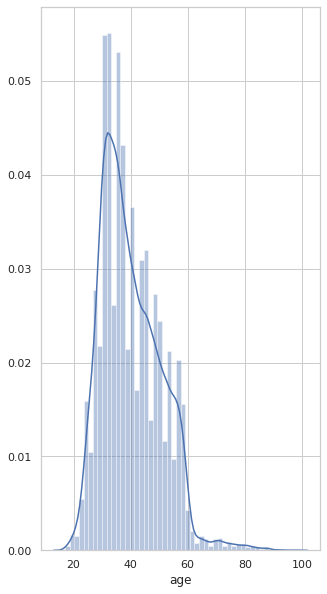

In [19]:
#Find the range of data
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")
sns.distplot(data["age"])

{'Mean': 258.2850101971448, 'Median': 180.0}

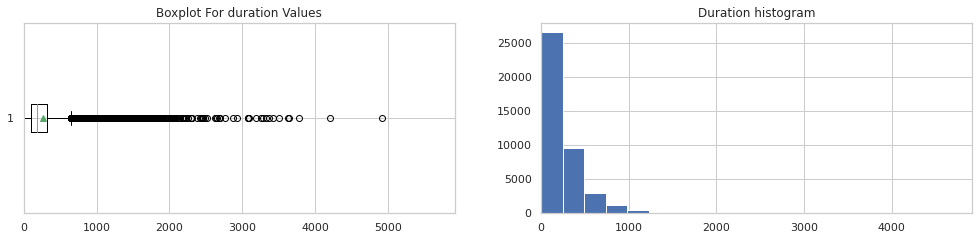

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(data.duration, showmeans=True,vert=False)
axes[0].set_xlim(0,max(data["duration"]+1000))
axes[0].set_title('Boxplot For duration Values')
axes[1].hist(data.duration, cumulative=False, bins=20)
axes[1].set_title("Duration histogram")
axes[1].set_xlim((min(data.duration), max(data.duration)))

{"Mean":np.mean(data.duration),"Median":np.median(data.duration)}

**Data correlation**

In [21]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


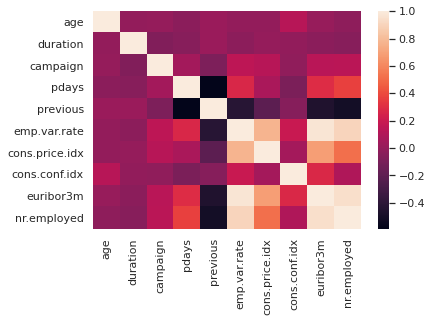

In [22]:
sns.heatmap(data.corr())

##**Data Preprocessing**

**1. Encoding categorical variables**

Learners like logistic regression, distance based methods such as kNN, support vector machines, tree based methods etc. in sklearn needs numeric arrays. Features having string values cannot be handled by these learners. 

Our data has some categorical variables and we will encode them using One Hot Encoder.

One-Hot Encoding transforms each categorical feature with n possible values into n binary features, with only one active.

Most of the ML algorithms either learn a single weight for each feature or it computes distance between the samples. Algorithms like linear models (such as logistic regression) belongs to the first category.

For tree based methods, same situation (more than two values in a feature) might effect the outcome to extent but if methods like random forests are deep enough, it can handle the categorical variables without one-hot encoding.

**Note: There are many ways to use OneHotEncoder and below i have highlighted two ways**

In [ ]:
 enc=OneHotEncoder(sparse=False)
pred_data_1=pred_data
columns=['job', 'marital', 'education', 'default',
          'housing', 'loan','contact','month','day_of_week','poutcome']
 for col in columns:
       # creating an exhaustive list of all possible categorical values
     data=pred_data[[col]]                                                                              
     enc.fit(data)
       # Fitting One Hot Encoding on train data
     temp = enc.transform(pred_data[[col]])
       # Changing the encoded features into a data frame with new column names
     temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
       # In side by side concatenation index values should be same
       # Setting the index values similar to the X_train data frame
     temp=temp.set_index(pred_data.index.values)
       # adding the new One Hot Encoded varibales to the train data frame
     pred_data_1=pd.concat([pred_data_1,temp],axis=1)

In [ ]:
pred_data_1

In [24]:
#Encoding our data using OneHotEncoder
# create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=['job', 'marital', 'education', 'default',
          'housing', 'loan','contact','month','day_of_week','poutcome'],use_cat_names=True)
# encode the categorical variables
pred1_data = OHE.fit_transform(data)

In [25]:
pred1_data

,age,job_housemaid,job_services,job_admin.,job_blue-collar,job_technician,job_retired,job_management,job_unemployed,job_self-employed,job_unknown,job_entrepreneur,job_student,marital_married,marital_single,marital_divorced,marital_unknown,education_basic.4y,education_high.school,education_basic.6y,education_basic.9y,education_professional.course,education_unknown,education_university.degree,education_illiterate,default_no,default_unknown,default_yes,housing_no,housing_yes,housing_unknown,loan_no,loan_yes,loan_unknown,contact_telephone,contact_cellular,month_may,month_jun,month_jul,month_aug,month_oct,month_nov,month_dec,month_mar,month_apr,month_sep,day_of_week_mon,day_of_week_tue,day_of_week_wed,day_of_week_thu,day_of_week_fri,duration,campaign,pdays,previous,poutcome_nonexistent,poutcome_failure,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,261,1,999,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,149,1,999,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,226,1,999,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,151,1,999,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,307,1,999,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,334,1,999,0,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,383,1,999,0,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,189,2,999,0,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,442,1,999,0,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes


In [26]:
#We will also label our target varible using label encoder, which is another type of encoding data
encoder = LabelEncoder()
pred1_data['y'] = encoder.fit_transform(pred1_data["y"])

In [27]:
#Now all our variables are numerical(int64 or float64)
pred1_data.dtypes

age                  int64
job_housemaid        int64
job_services         int64
job_admin.           int64
job_blue-collar      int64
                    ...   
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                    int64
Length: 64, dtype: object

**2. Scaling Numerical Data**

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range.

Standardizing is a popular scaling technique that subtracts the mean from values and divides by the standard deviation, transforming the probability distribution for an input variable to a standard Gaussian (zero mean and unit variance). Standardization can become skewed or biased if the input variable contains outlier values.

To overcome this, the median and interquartile range can be used when standardizing numerical input variables, generally referred to as robust scaling.

In this section we will use RobustScaler because it works well in data with outliers

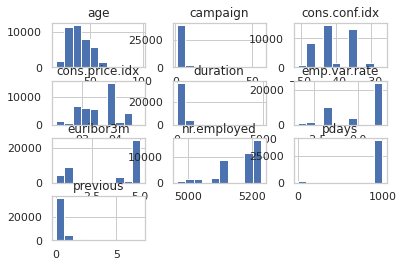

In [79]:
data.hist()
plt.show()

In [29]:
# retrieve just the numeric input values
num_cols = ['emp.var.rate',"pdays","age", 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']

In [30]:
# perform a robust scaler transform of the dataset
trans = RobustScaler()
pred1_data[num_cols] = trans.fit_transform(pred1_data[num_cols])


In [31]:
#Scaled data
pred1_data

,age,job_housemaid,job_services,job_admin.,job_blue-collar,job_technician,job_retired,job_management,job_unemployed,job_self-employed,job_unknown,job_entrepreneur,job_student,marital_married,marital_single,marital_divorced,marital_unknown,education_basic.4y,education_high.school,education_basic.6y,education_basic.9y,education_professional.course,education_unknown,education_university.degree,education_illiterate,default_no,default_unknown,default_yes,housing_no,housing_yes,housing_unknown,loan_no,loan_yes,loan_unknown,contact_telephone,contact_cellular,month_may,month_jun,month_jul,month_aug,month_oct,month_nov,month_dec,month_mar,month_apr,month_sep,day_of_week_mon,day_of_week_tue,day_of_week_wed,day_of_week_thu,day_of_week_fri,duration,campaign,pdays,previous,poutcome_nonexistent,poutcome_failure,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.200000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,261,1,0.0,0,1,0,0,0.0000,0.266594,0.857143,0.000000,0.000000,0
1,1.266667,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,149,1,0.0,0,1,0,0,0.0000,0.266594,0.857143,0.000000,0.000000,0
2,-0.066667,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,226,1,0.0,0,1,0,0,0.0000,0.266594,0.857143,0.000000,0.000000,0
3,0.133333,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,151,1,0.0,0,1,0,0,0.0000,0.266594,0.857143,0.000000,0.000000,0
4,1.200000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,307,1,0.0,0,1,0,0,0.0000,0.266594,0.857143,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.333333,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,334,1,0.0,0,1,0,0,-0.6875,1.107726,-1.428571,-1.058612,-1.762791,1
41184,0.533333,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,383,1,0.0,0,1,0,0,-0.6875,1.107726,-1.428571,-1.058612,-1.762791,0
41185,1.200000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,189,2,0.0,0,1,0,0,-0.6875,1.107726,-1.428571,-1.058612,-1.762791,0
41186,0.400000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,442,1,0.0,0,1,0,0,-0.6875,1.107726,-1.428571,-1.058612,-1.762791,1


There is need for us to separate our target variable from the rest of the dataset.
Also we will also drop the duration column because this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 

In [32]:
X = pred1_data.drop(columns=[ "y","duration"]) #dropping the duration column
y = pred1_data["y"]
print(X.shape)
print(y.shape)

(41188, 62)
(41188,)


## **3. Dimensionality reduction using PCA**

PCA is a technique for reducing the number of dimensions in a dataset whilst retaining most information. It is using the correlation between some dimensions and tries to provide a minimum number of variables that keeps the maximum amount of variation or information about how the original data is distributed.

In [33]:
#our data
X

,age,job_housemaid,job_services,job_admin.,job_blue-collar,job_technician,job_retired,job_management,job_unemployed,job_self-employed,job_unknown,job_entrepreneur,job_student,marital_married,marital_single,marital_divorced,marital_unknown,education_basic.4y,education_high.school,education_basic.6y,education_basic.9y,education_professional.course,education_unknown,education_university.degree,education_illiterate,default_no,default_unknown,default_yes,housing_no,housing_yes,housing_unknown,loan_no,loan_yes,loan_unknown,contact_telephone,contact_cellular,month_may,month_jun,month_jul,month_aug,month_oct,month_nov,month_dec,month_mar,month_apr,month_sep,day_of_week_mon,day_of_week_tue,day_of_week_wed,day_of_week_thu,day_of_week_fri,campaign,pdays,previous,poutcome_nonexistent,poutcome_failure,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.200000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0,0,1,0,0,0.0000,0.266594,0.857143,0.000000,0.000000
1,1.266667,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0,0,1,0,0,0.0000,0.266594,0.857143,0.000000,0.000000
2,-0.066667,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0,0,1,0,0,0.0000,0.266594,0.857143,0.000000,0.000000
3,0.133333,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0,0,1,0,0,0.0000,0.266594,0.857143,0.000000,0.000000
4,1.200000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0,0,1,0,0,0.0000,0.266594,0.857143,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.333333,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0.0,0,1,0,0,-0.6875,1.107726,-1.428571,-1.058612,-1.762791
41184,0.533333,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0.0,0,1,0,0,-0.6875,1.107726,-1.428571,-1.058612,-1.762791
41185,1.200000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0.0,0,1,0,0,-0.6875,1.107726,-1.428571,-1.058612,-1.762791
41186,0.400000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0.0,0,1,0,0,-0.6875,1.107726,-1.428571,-1.058612,-1.762791


Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

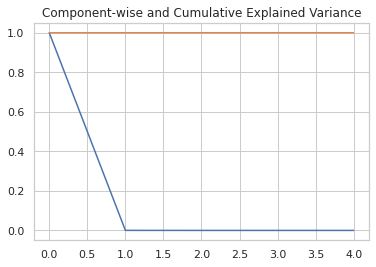

In [34]:
pca = PCA(n_components=5) #We will choose five components
pca_result = pca.fit_transform(X)
plt.plot(range(5), pca.explained_variance_ratio_)
plt.plot(range(5), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

In [35]:
X=pd.DataFrame(pca_result)  #We will transform the result from PCA to dataframe

In [36]:
X #Viewing the dataset

,0,1,2,3,4
0,-36.524563,-1.538333,-1.332862,1.092861,0.290603
1,-36.524955,-1.528701,-1.498846,1.129133,0.598088
2,-36.524722,-1.546142,-1.078061,-0.011194,-0.079683
3,-36.524660,-1.539335,-1.203609,0.146894,-0.118252
4,-36.524617,-1.537743,-1.282445,0.838387,0.253542
...,...,...,...,...,...
41183,-36.521264,-1.638921,0.870047,1.335004,1.806597
41184,-36.521773,-1.637721,0.838259,-0.033313,1.807701
41185,-36.522105,-0.643805,1.057920,0.495783,1.372093
41186,-36.521653,-1.637208,0.878545,-0.168060,1.475272


##**Data splitting into train and test data**

In [37]:
ran=RandomOverSampler()
X_ran,y_ran= ran.fit_resample(X,y)

print('The new data contains {} rows '.format(X_ran.shape[0]))

#plot_2d_space(X_ran,y_ran,X,y,'over-sampled')

The new data contains 73096 rows 


In [38]:
#For training and testing of the model we will split the data, 90% of the data, training data and 10% to test data

X_train,X_test,y_train,y_test = train_test_split(X_ran,y_ran,test_size = 0.1,random_state=1)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(65786, 5)
(65786,)
(7310, 5)
(7310,)


## **Algorithm tuning**

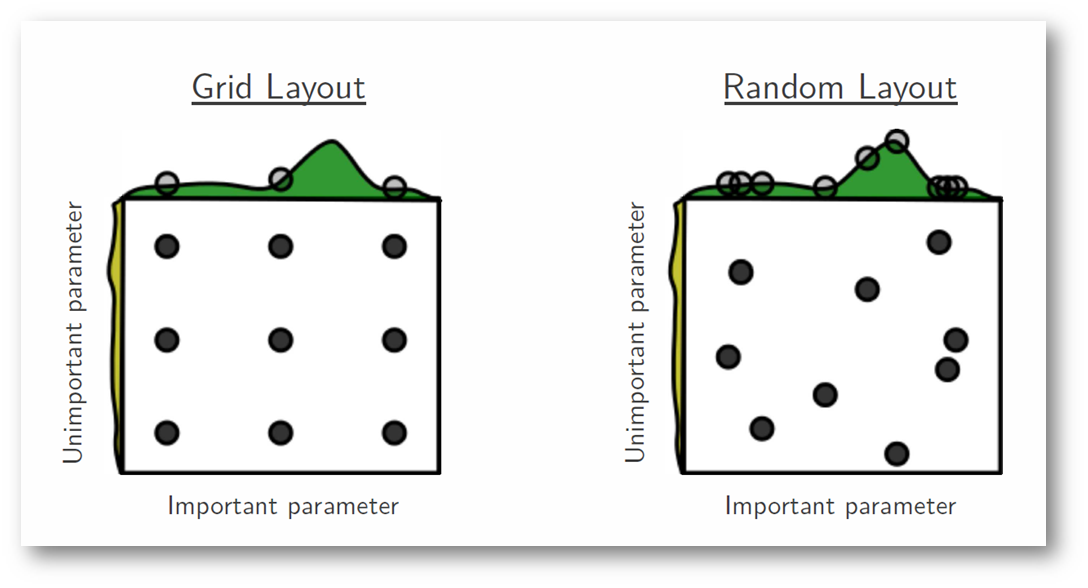

In [39]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

In [40]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

## **1. Logistic Regression**

* C : Regularization value, the more, the stronger the regularization(double).
* RegularizationType: Can be either "L2" or “L1”. Default is “L2”.

In [41]:
# model
model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [42]:
LR_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test)

Best: 0.705515 using {'C': 0.3712032345629517, 'penalty': 'l2'}


In [43]:
report1 = classification_report(y_test, Prediction_LR)
print(report1)

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      3705
           1       0.71      0.70      0.70      3605

    accuracy                           0.71      7310
   macro avg       0.71      0.71      0.71      7310
weighted avg       0.71      0.71      0.71      7310



In [44]:
# create an object of the LinearRegression Model
model_LR = LogisticRegression()

# fit the model with the training data
model_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
predict_test  = model_LR.predict(X_test)

In [46]:
confusion_matrix = confusion_matrix(y_test, predict_test)

In [47]:
confusion_matrix

array([[2665, 1040],
       [1086, 2519]])

**Intepretating Confusion Matrix**


|  | Predicted: No | Predicted Yes |
| --- | --- | --- |
| Actual No |TN: 3567  | FP: 47 |
|  |  |  |
| Actual Yes |FN: 407  | TP: 98 |

1. Correct predictions: 3567 + 98 = 3665

2. Wrong Predictions: 407+ 47 = 454

In [48]:
pd.crosstab(pd.Series(predict_test,name="Predicted"),
            pd.Series(y, name="Actual"))

Actual,0,1
Predicted,,
0,3642,109
1,3452,107


In [49]:
report = classification_report(y_test, predict_test)

In [50]:
print(report)

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      3705
           1       0.71      0.70      0.70      3605

    accuracy                           0.71      7310
   macro avg       0.71      0.71      0.71      7310
weighted avg       0.71      0.71      0.71      7310



# **ROC Curve**

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.762


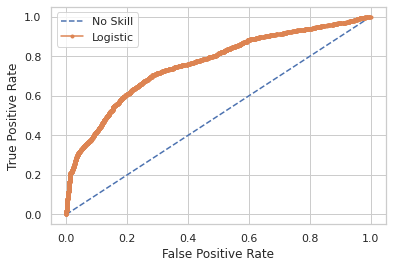

In [51]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model_LR.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## **2. XGBoost**

In [81]:
# fit model with training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.79%


In [53]:
pd.crosstab(pd.Series(y_pred,name="Predicted"),
            pd.Series(y, name="Actual"))

Actual,0,1
Predicted,,
0,4098,115
1,2996,101


In [54]:
xgb_report = classification_report(y_test, y_pred)
print(xgb_report)

              precision    recall  f1-score   support

           0       0.71      0.81      0.76      3705
           1       0.77      0.66      0.71      3605

    accuracy                           0.74      7310
   macro avg       0.74      0.74      0.74      7310
weighted avg       0.74      0.74      0.74      7310



# **ROC Curve for XGBoost**

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.800


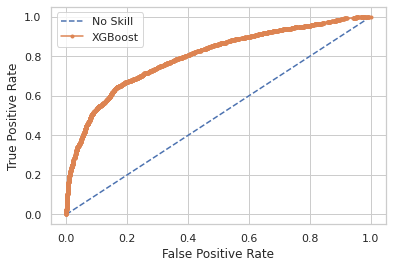

In [80]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## **3. Multilayer perceptron**

In [56]:
# Define the sigmoid activator; we ask if we want the sigmoid or its derivative
def sigmoid_act(x, der=False):
    import numpy as np
    
    if (der==True) : #derivative of the sigmoid
        f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
    else : # sigmoid
        f = 1/(1+ np.exp(- x))
    
    return f

# We may employ the Rectifier Linear Unit (ReLU)
def ReLU_act(x, der=False):
    import numpy as np
    
    if (der == True): # the derivative of the ReLU is the Heaviside Theta
        f = np.heaviside(x, 1)
    else :
        f = np.maximum(x, 0)
    
    return f

In [57]:
def ANN_train(X_train, y_train, p=8, q=4, eta=0.0015):
    
    # 0: Random initialize the relevant data 
    w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
    b1 = np.random.rand(p)

    w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
    b2 = np.random.rand(q)

    wOut = 2*np.random.rand(q) - 0.5   # Output Layer
    bOut = np.random.rand(1)

    mu = []
    vec_y = []

    # Start looping over the passengers, i.e. over I.

    for I in range(0, X_train.shape[0]-1): #loop in all the passengers:
    
        # 1: input the data 
        x = X_train[I]
    
        # 2: Start the algorithm
     # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer
    
        #2.2: Compute the output layer's error
        delta_Out = 2 * (y-y_train[I]) * sigmoid_act(y, der=True)
    
        #2.3: Backpropagate
        delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
        delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error
    
        # 3: Gradient descent 
        wOut = wOut - eta*delta_Out*z2  # Outer Layer
        bOut = bOut - eta*delta_Out
    
        w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
        b2 = b2 -  eta*delta_2
    
        w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0])
        b1 = b1 - eta*delta_1
    
        # 4. Computation of the loss function
        mu.append((y-y_train[I])**2)
        vec_y.append(y)
        batch_loss = []
    for i in range(0, 10):
        loss_avg = 0
        for m in range(0, 60):
            loss_avg+=vec_y[60*i+m]/60
        batch_loss.append(loss_avg)
    
    
    plt.figure(figsize=(10,6))
    plt.scatter(np.arange(1, len(batch_loss)+1), batch_loss, alpha=1, s=10, label='error')
    plt.title('Averege Loss by epoch', fontsize=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.show()
    
    return w1, b1, w2, b2, wOut, bOut, mu

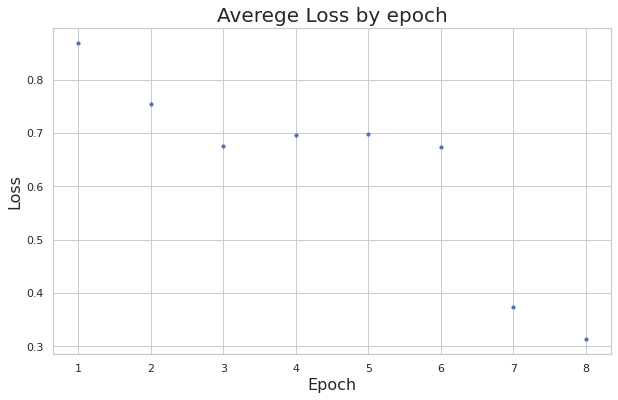

In [58]:
w1, b1, w2, b2, wOut, bOut, mu = ANN_train(X_train,y_train, p=8, q=4, eta=0.0015)

In [59]:
def ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu):
    import numpy as np
    
    pred = []
    
    for I in range(0, X_test.shape[0]): #loop in all the passengers
        # 1: input the data 
        x = X_test[I]
        
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut)  # Output of the Output layer
        
        # Append the prediction;
        # We now need a binary classifier; we this apply an Heaviside Theta and we set to 0.5 the threshold
        # if y < 0.5 the output is zero, otherwise is 1
        pred.append( np.heaviside(y - 0.5, 1)[0] )
    
    
    return np.array(pred);

In [61]:
predictions = ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu)

In [ ]:
pd.crosstab(pd.Series(predictions,name="Predicted"),
            pd.Series(y_train, name="Actual"))

In [ ]:
accuracy_ANN = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
mlp_report = classification_report(y_test, predictions)
print(mlp_report)

In [ ]:
'''
Artificial Neural Network Class
'''
class ANN:
    import numpy as np # linear algebra
    np.random.seed(10)
    
    '''
    Initialize the ANN;
    HiddenLayer vector : will contain the Layers' info
    w, b, phi = (empty) arrays that will contain all the w, b and activation functions for all the Layers
    mu = cost function
    eta = a standard learning rate initialization. It can be modified by the 'set_learning_rate' method
    '''
    def __init__(self) :
        self.HiddenLayer = []
        self.w = []
        self.b = []
        self.phi = []
        self.mu = []
        self.eta = 1 #set up the proper Learning Rate!!

        '''
    add method: to add layers to the network
    '''
    def add(self, lay = (4, 'ReLU') ):
        self.HiddenLayer.append(lay)
    
    '''
    FeedForward method: as explained before. 
    '''
    @staticmethod
    def FeedForward(w, b, phi, x):
        return phi(np.dot(w, x) + b)
        
    '''
    BackPropagation algorithm implementing the Gradient Descent 
    '''
    def BackPropagation(self, x, z, Y, w, b, phi):
        self.delta = []
        
        # We initialize ausiliar w and b that are used only inside the backpropagation algorithm once called        
        self.W = []
        self.B = []


        # We start computing the LAST error, the one for the OutPut Layer 
        self.delta.append(  (z[len(z)-1] - Y) * phi[len(z)-1](z[len(z)-1], der=True) )
        
        '''Now we BACKpropagate'''
        # We thus compute from next-to-last to first
        for i in range(0, len(z)-1):
            self.delta.append( np.dot( self.delta[i], w[len(z)- 1 - i] ) * phi[len(z)- 2 - i](z[len(z)- 2 - i], der=True) )
        
        # We have the error array ordered from last to first; we flip it to order it from first to last
        self.delta = np.flip(self.delta, 0)  
        
        # Now we define the delta as the error divided by the number of training samples
        self.delta = self.delta/self.X.shape[0] 
        
        '''GRADIENT DESCENT'''
        # We start from the first layer that is special, since it is connected to the Input Layer
        self.W.append( w[0] - self.eta * np.kron(self.delta[0], x).reshape( len(z[0]), x.shape[0] ) )
        self.B.append( b[0] - self.eta * self.delta[0] )
        
        # We now descend for all the other Hidden Layers + OutPut Layer
        for i in range(1, len(z)):
            self.W.append( w[i] - self.eta * np.kron(self.delta[i], z[i-1]).reshape(len(z[i]), len(z[i-1])) )
            self.B.append( b[i] - self.eta * self.delta[i] )


            # We return the descended parameters w, b
        return np.array(self.W), np.array(self.B)
    
    
    '''
    Fit method: it calls FeedForward and Backpropagation methods
    '''
    def Fit(self, X_train, Y_train):            
        print('Start fitting...')
        '''
        Input layer
        '''
        self.X = X_train
        self.Y = Y_train
        
        '''
        We now initialize the Network by retrieving the Hidden Layers and concatenating them 
        '''
        print('Model recap: \n')
        print('You are fitting an ANN with the following amount of layers: ', len(self.HiddenLayer))
        
        for i in range(0, len(self.HiddenLayer)) :
            print('Layer ', i+1)
            print('Number of neurons: ', self.HiddenLayer[i][0])
            if i==0:
                # We now try to use the He et al. Initialization from ArXiv:1502.01852
                self.w.append( np.random.randn(self.HiddenLayer[i][0] , self.X.shape[1])/np.sqrt(2/self.X.shape[1]) )
                self.b.append( np.random.randn(self.HiddenLayer[i][0])/np.sqrt(2/self.X.shape[1]))
                # Old initialization
                #self.w.append(2 * np.random.rand(self.HiddenLayer[i][0] , self.X.shape[1]) - 0.5)
                #self.b.append(np.random.rand(self.HiddenLayer[i][0]))
                
                # Initialize the Activation function
                for act in Activation_function.list_act():
                    if self.HiddenLayer[i][1] == act :
                        self.phi.append(Activation_function.get_act(act))
                        print('\tActivation: ', act)

            else :
                # We now try to use the He et al. Initialization from ArXiv:1502.01852
                self.w.append( np.random.randn(self.HiddenLayer[i][0] , self.HiddenLayer[i-1][0] )/np.sqrt(2/self.HiddenLayer[i-1][0]))
                self.b.append( np.random.randn(self.HiddenLayer[i][0])/np.sqrt(2/self.HiddenLayer[i-1][0]))
                # Old initialization
                #self.w.append(2*np.random.rand(self.HiddenLayer[i][0] , self.HiddenLayer[i-1][0] ) - 0.5)
                #self.b.append(np.random.rand(self.HiddenLayer[i][0]))
                
                # Initialize the Activation function
                for act in Activation_function.list_act():
                    if self.HiddenLayer[i][1] == act :
                        self.phi.append(Activation_function.get_act(act))
                        print('\tActivation: ', act)
            
        '''
        Now we start the Loop over the training dataset
        '''  
        for I in range(0, self.X.shape[0]): # loop over the training set
            '''
            Now we start the feed forward
            '''  
            self.z = []
            
            self.z.append( self.FeedForward(self.w[0], self.b[0], self.phi[0], self.X[I]) ) # First layers
            
            for i in range(1, len(self.HiddenLayer)): #Looping over layers
                self.z.append( self.FeedForward(self.w[i] , self.b[i], self.phi[i], self.z[i-1] ) )
            

            #self.w.append(2*np.random.rand(self.HiddenLayer[i][0] , self.HiddenLayer[i-1][0] ) - 0.5)
                #self.b.append(np.random.rand(self.HiddenLayer[i][0]))
                
                # Initialize the Activation function
                for act in Activation_function.list_act():
                    if self.HiddenLayer[i][1] == act :
                        self.phi.append(Activation_function.get_act(act))
                        print('\tActivation: ', act)
                #self.w.append(2*np.random.rand(self.HiddenLayer[i][0] , self.HiddenLayer[i-1][0] ) - 0.5)
                #self.b.append(np.random.rand(self.HiddenLayer[i][0]))
                
                # Initialize the Activation function
                for act in Activation_function.list_act():
                    if self.HiddenLayer[i][1] == act :
                        self.phi.append(Activation_function.get_act(act))
                        print('\tActivation: ', act)


                #self.w.append(2*np.random.rand(self.HiddenLayer[i][0] , self.HiddenLayer[i-1][0] ) - 0.5)
                #self.b.append(np.random.rand(self.HiddenLayer[i][0]))
                
                # Initialize the Activation function
                for act in Activation_function.list_act():
                    if self.HiddenLayer[i][1] == act :
                        self.phi.append(Activation_function.get_act(act))
                        print('\tActivation: ', act)
            
        '''
        Now we start the Loop over the training dataset
        '''  
        for I in range(0, self.X.shape[0]): # loop over the training set
            '''
            Now we start the feed forward
            '''  
            self.z = []
            
            self.z.append( self.FeedForward(self.w[0], self.b[0], self.phi[0], self.X[I]) ) # First layers
            
            for i in range(1, len(self.HiddenLayer)): #Looping over layers
                self.z.append( self.FeedForward(self.w[i] , self.b[i], self.phi[i], self.z[i-1] ) )


            '''
            Here we backpropagate
            '''      
            self.w, self.b  = self.BackPropagation(self.X[I], self.z, self.Y[I], self.w, self.b, self.phi)
            
            '''
            Compute cost function
            ''' 
            self.mu.append(
                (1/2) * np.dot(self.z[len(self.z)-1] - self.Y[I], self.z[len(self.z)-1] - self.Y[I]) 
            )
            
        print('Fit done. \n')
        

    
    '''
    predict method
    '''
    def predict(self, X_test):
        
        print('Starting predictions...')


        self.pred = []
        self.XX = X_test
        
        for I in range(0, self.XX.shape[0]): # loop over the training set
            
            '''
            Now we start the feed forward
            '''  
            self.z = []
            
            self.z.append(self.FeedForward(self.w[0] , self.b[0], self.phi[0], self.XX[I])) #First layer
    
            for i in range(1, len(self.HiddenLayer)) : # loop over the layers
                self.z.append( self.FeedForward(self.w[i] , self.b[i], self.phi[i], self.z[i-1]))
       
            # Append the prediction;
            # We now need a binary classifier; we this apply an Heaviside Theta and we set to 0.5 the threshold
            # if y < 0.5 the output is zero, otherwise is zero
            self.pred.append( np.heaviside(  self.z[-1] - 0.5, 1)[0] ) # NB: self.z[-1]  is the last element of the self.z list

            print('Predictions done. \n')

        return np.array(self.pred)
   
    '''
    We need a method to retrieve the accuracy for each training data to follow the learning of the ANN
    '''
    def get_accuracy(self):
        return np.array(self.mu)
    # This is the averaged version
    def get_avg_accuracy(self):
        import math
        self.batch_loss = []
        for i in range(0, 10):
            self.loss_avg = 0
            # To set the batch in 10 element/batch we use math.ceil method
            # int(math.ceil((self.X.shape[0]-10) / 10.0))    - 1
            for m in range(0, (int(math.ceil((self.X.shape[0]-10) / 10.0))   )-1):
                #self.loss_avg += self.mu[60*i+m]/60
                self.loss_avg += self.mu[(int(math.ceil((self.X.shape[0]-10) / 10.0)) )*i + m]/(int(math.ceil((self.X.shape[0]-10) / 10.0)) )
            self.batch_loss.append(self.loss_avg)
        return np.array(self.batch_loss)
    
    '''
    Method to set the learning rate
    '''
    def set_learning_rate(self, et=1):
        self.eta = et
        
        
'''
layers class
'''
class layers :
    '''
    Layer method: used to call standar layers to add. 
    Easily generalizable to more general layers (Pooling and Convolutional layers)
    '''        
    def layer(p=4, activation = 'ReLU'):
        return (p, activation)

'''
Activation functions class
'''
class Activation_function(ANN):
  def __init__(self) :
        super().__init__()
        
        '''
        Define the sigmoid activator; we ask if we want the sigmoid or its derivative
        '''
        def sigmoid_act(x, der=False):
            if (der==True) : #derivative of the sigmoid
                f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
            else : # sigmoid
                f = 1/(1+ np.exp(- x))
            return f

        '''
        Define the Rectifier Linear Unit (ReLU)
        '''
        def ReLU_act(x, der=False):
            if (der == True): # the derivative of the ReLU is the Heaviside Theta
                f = np.heaviside(x, 1)
            else :
                f = np.maximum(x, 0)
            return f
    
        def list_act():
            return ['sigmoid', 'ReLU']
        def get_act(string = 'ReLU'):
            if string == 'ReLU':
                return ReLU_act
            elif string == 'sigmoid':
                return sigmoid_act
            else :
                return sigmoid_act    
        

        

Instantiating the class and Fitting the model

Now we instantiate our model, that will be exactly the same as before, i.e. a two-hidden layer with 8 and 4 neurons respectively and with ReLU activation plus an OutPut layer with a single neuron with sigmoid activation.

We will set the learning rate and then fit the model; after that we recover the accuracy history (even in the averaged over 10 batches) and finally we compute the predictions.

In [ ]:
model = ANN()

model.add(layers.layer(8, 'ReLU'))
model.add(layers.layer(4, 'ReLU'))
model.add(layers.layer(1, 'sigmoid'))

model.set_learning_rate(0.8)

model.Fit(train_x, train_y)
acc_val = model.get_accuracy()
acc_avg_val = model.get_avg_accuracy()

predictions = model.predict(test_x)

## **4. Random Forest**

In [66]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
clf.fit(X_train,y_train)

RF_pred=clf.predict(X_test)

In [67]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, RF_pred))

Accuracy: 0.9690834473324214


# **ROC Curve for Random Forest**

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.996


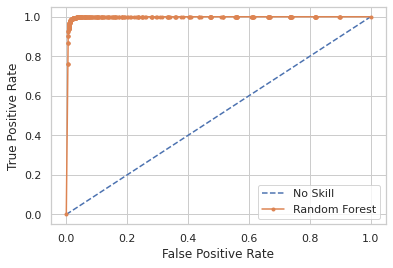

In [77]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## **5. Decision Tree**

* max_depth: Maximum depth of the tree (double).
* row_subsample: Proportion of observations to consider (double).
* max_features: Proportion of columns (features) to consider in each level (double).

In [70]:
from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  randint(1, 4)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]

In [71]:
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

In [72]:
model_CART = DecisionTreeClassifier()
CART_RandSearch = RandomSearch(X_train,y_train,model_CART,param_grid)
Prediction_CART = CART_RandSearch.BestModelPridict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, Prediction_CART))

Best: 0.948211 using {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1}
Accuracy: 0.9430916552667579


In [73]:
pd.crosstab(pd.Series(Prediction_CART,name="Predicted"),
            pd.Series(y, name="Actual"))

Actual,0,1
Predicted,,
0,3196,97
1,3898,119


In [74]:
DC_report = classification_report(y_test, Prediction_CART)
print(DC_report)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      3705
           1       0.90      1.00      0.95      3605

    accuracy                           0.94      7310
   macro avg       0.95      0.94      0.94      7310
weighted avg       0.95      0.94      0.94      7310



In [ ]:
confusion_matrix

**Intepretating Confusion Matrix**


|  | Predicted: No | Predicted Yes |
| --- | --- | --- |
| Actual No |TN: 3569  | FP: 45 |
|  |  |  |
| Actual Yes |FN: 409  | TP: 96 |

1. Correct predictions: 3569 + 96 = 3665

2. Wrong Predictions: 409+ 45 = 454